In [6]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

import matplotlib.pyplot as plt

%matplotlib inline

from sqlalchemy import create_engine
import warnings

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

ed_df = pd.read_sql_query("select * from useducation", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [5]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

<IPython.core.display.Javascript object>

In [22]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


<IPython.core.display.Javascript object>

In [40]:
# taking care of the missing values by interpolating within each year and for each state.

col_names = ed_df.columns.unique()

col_names = col_names[2:]

states = ed_df["STATE"].unique()

for state in states:
    ed_df.loc[ed_df["STATE"] == state, col_names] = ed_df.loc[
        ed_df["STATE"] == state, col_names
    ].interpolate()

<IPython.core.display.Javascript object>

In [41]:
ed_df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.448330
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,211.616130,257.647254,208.685273,266.423396
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,50807.0,47665.0,34770.0,403871.0,164260.0,575380.0,222.219036,273.200878,215.523979,266.856804
58,1993_CONNECTICUT,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,...,39093.0,34662.0,27979.0,310022.0,127655.0,443893.0,228.105503,275.202320,224.712775,264.457874
59,1993_DELAWARE,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,...,8285.0,8265.0,5882.0,67899.0,28930.0,97394.0,217.181255,263.834857,207.792430,262.255809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304


<IPython.core.display.Javascript object>

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [42]:
ed_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.281000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.281000e+03,...,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.443000e+03,1277.000000,1273.000000,1250.000000,1097.000000
mean,2004.433646,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,...,64216.228283,63883.304040,54378.534680,5.161999e+05,2.463631e+05,8.016962e+05,232.814597,277.190134,218.415385,263.449974
std,7.393983,1.067856e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,3.420267e+06,5.426507e+05,...,80504.894652,79037.699179,68781.870366,6.442378e+05,3.092694e+05,9.820252e+05,10.624230,10.360192,7.925924,5.793772
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,6.447875e+05,1.043740e+05,...,13311.000000,13018.000000,10741.000000,1.071090e+05,5.008300e+04,1.727145e+05,226.521892,271.201400,214.240213,259.838592
50%,2004.000000,6.515540e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,1.545738e+06,2.741430e+05,...,42784.000000,43018.000000,36469.000000,3.425700e+05,1.622720e+05,5.449220e+05,234.531807,278.991890,220.066145,264.319646
75%,2011.000000,1.014528e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,3.307162e+06,5.261780e+05,...,75322.000000,76376.000000,67716.000000,6.102640e+05,2.913940e+05,9.282755e+05,240.979792,284.092212,223.838858,267.490028
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


<IPython.core.display.Javascript object>

On average, total expenditure is more than total revenue.  Also local revenue is on average almost the same as state revenue, but more than federal.  The standard deviations of the reading scores are less than the standard deviations of the math scores.

In [44]:
ed_df.describe(include=["O"])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


<IPython.core.display.Javascript object>

In [46]:
print(ed_df["STATE"].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_EDUCATION' 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY'
 'U.S._VIRGIN_ISLANDS' 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)' 'BIE'
 'DOD_-_FOREIGN' 'COMMONWEALTH_OF_MARIANAS' 'AS' 'GU' 'MP' 

<IPython.core.display.Javascript object>

I also find it remarkable that there are us territories included in these data.  Does DOD really need to be compared to California?

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

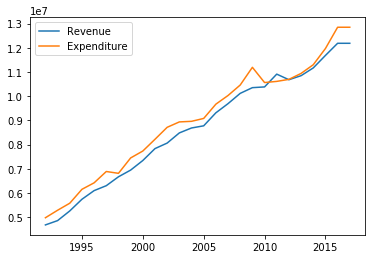

<IPython.core.display.Javascript object>

In [81]:
mn = ed_df.loc[ed_df["STATE"] == "MINNESOTA"]

mn_yrs = mn["YEAR"]

mn_rev = mn["TOTAL_REVENUE"]

mn_exp = mn["TOTAL_EXPENDITURE"]

plt.plot(mn_yrs, mn_rev, label="Revenue")
plt.plot(mn_yrs, mn_exp, label="Expenditure")
plt.legend()
plt.show()

These two variables closely follow one another. Expenditure almost always exceeds revenue.  The dip around 2008 coincides with the Great Recession.  

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [82]:
mn.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,25.00000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,25.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,18.000000
mean,2004.500000,815542.84000,8.665786e+06,4.934488e+05,5.327639e+06,2.844698e+06,9.014992e+06,4.593158e+06,2.186863e+06,685423.960000,...,62463.846154,64357.269231,67740.461538,503712.423077,265959.500000,781227.153846,241.931062,289.873654,223.352110,266.518770
std,7.648529,16316.85063,2.330354e+06,2.378358e+05,1.792044e+06,5.142467e+05,2.316433e+06,1.251362e+06,5.315510e+05,158775.200493,...,2135.756834,2281.176268,6373.030784,12396.324420,14898.637262,16202.567623,8.218856,4.405506,2.002319,5.606681
min,1992.000000,781566.00000,4.684684e+06,1.940920e+05,2.284106e+06,1.956277e+06,4.981125e+06,2.534882e+06,1.327959e+06,452482.000000,...,58563.000000,59810.000000,53813.000000,484680.000000,224426.000000,731758.000000,228.493596,282.392205,218.301709,253.329004
25%,1998.250000,802913.00000,6.741575e+06,3.156995e+05,3.545085e+06,2.397046e+06,7.030821e+06,3.501689e+06,1.755156e+06,551475.000000,...,60709.250000,62943.000000,64556.250000,492908.500000,262299.250000,775208.250000,233.924350,286.075631,222.628525,264.520974
50%,2004.500000,811157.00000,8.732839e+06,5.180255e+05,5.998912e+06,2.835462e+06,9.022993e+06,4.571904e+06,2.144254e+06,653077.000000,...,62815.000000,64206.000000,69441.000000,506489.500000,266985.000000,781688.500000,244.787717,290.528791,223.731042,266.731914
75%,2010.750000,827418.00000,1.060719e+07,6.303110e+05,6.571509e+06,3.180490e+06,1.067538e+07,5.675189e+06,2.580895e+06,805204.000000,...,64070.500000,66194.500000,72267.500000,514508.500000,277910.500000,792965.500000,249.189228,294.124603,224.636909,269.955539
max,2017.000000,843802.00000,1.218614e+07,1.245368e+06,7.887346e+06,3.779550e+06,1.284895e+07,6.548885e+06,3.016934e+06,954208.000000,...,65362.000000,67909.000000,74749.000000,519641.000000,282120.000000,800793.000000,253.420961,294.946423,227.030742,274.497568


<IPython.core.display.Javascript object>

They're more successful at math in both 4th and 8th grade.

## 4. What are the distributions of the math and reading scores in the sample?

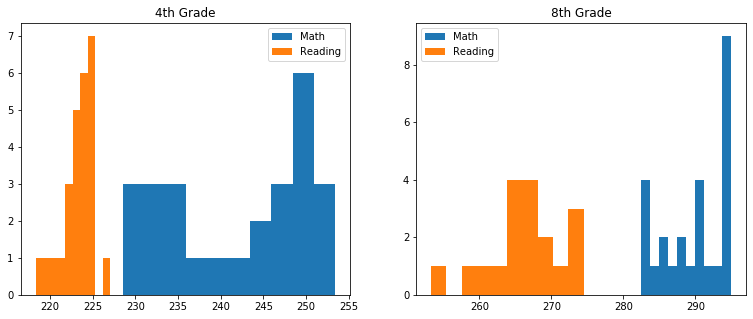

<IPython.core.display.Javascript object>

In [126]:
mn4_math = mn["AVG_MATH_4_SCORE"]
mn4_read = mn["AVG_READING_4_SCORE"]
mn8_math = mn["AVG_MATH_8_SCORE"]
mn8_read = mn["AVG_READING_8_SCORE"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.hist(mn4_math, label="Math")
ax1.hist(mn4_read, label="Reading")
ax1.set_title("4th Grade")
ax1.legend()

ax2.hist(mn8_math, label="Math")
ax2.hist(mn8_read, label="Reading")
ax2.set_title("8th Grade")
ax2.legend()

plt.show()

<font color=blue> The distributions are represented in the histograms above.  They certainly do not look normally distributed. </font>

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [109]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

raw_df = pd.read_sql_query("select * from useducation", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [115]:
mn_raw_df = raw_df.loc[raw_df["STATE"] == "MINNESOTA"]

<IPython.core.display.Javascript object>

In [127]:
mn_interpolate_df = mn_raw_df.copy()
mn_mean_df = mn_raw_df.copy()
mn_median_df = mn_raw_df.copy()

mn_interpolate_df = mn_interpolate_df.interpolate(limit_direction="both")
mn_mean_df = mn_mean_df.fillna(mn_raw_df.mean())
mn_median_df = mn_median_df.fillna(mn_raw_df.median())

<IPython.core.display.Javascript object>

In [144]:
math_4_raw = mn_raw_df["AVG_MATH_4_SCORE"]
math_8_raw = mn_raw_df["AVG_MATH_8_SCORE"]
read_4_raw = mn_raw_df["AVG_READING_4_SCORE"]
read_8_raw = mn_raw_df["AVG_READING_8_SCORE"]

math_4_interp = mn_interpolate_df["AVG_MATH_4_SCORE"]
math_8_interp = mn_interpolate_df["AVG_MATH_8_SCORE"]
math_4_mean = mn_mean_df["AVG_MATH_4_SCORE"]
math_8_mean = mn_mean_df["AVG_MATH_8_SCORE"]
math_4_median = mn_median_df["AVG_MATH_4_SCORE"]
math_8_median = mn_median_df["AVG_MATH_8_SCORE"]

read_4_interp = mn_interpolate_df["AVG_READING_4_SCORE"]
read_8_interp = mn_interpolate_df["AVG_READING_8_SCORE"]
read_4_mean = mn_mean_df["AVG_READING_4_SCORE"]
read_8_mean = mn_mean_df["AVG_READING_8_SCORE"]
read_4_median = mn_median_df["AVG_READING_4_SCORE"]
read_8_median = mn_median_df["AVG_READING_8_SCORE"]

<IPython.core.display.Javascript object>

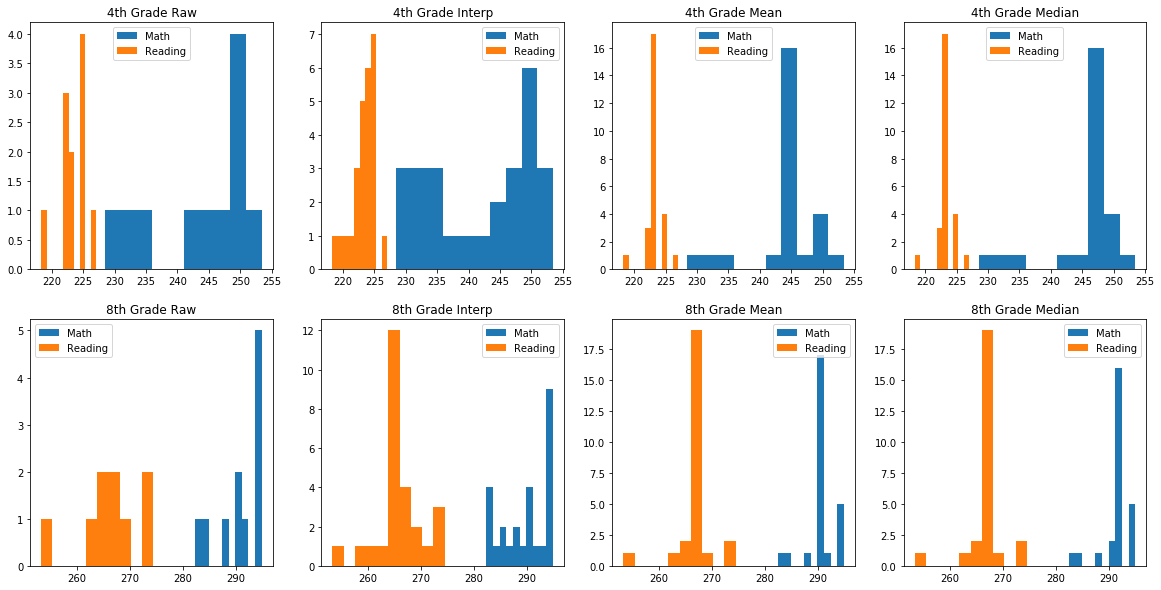

<IPython.core.display.Javascript object>

In [156]:
fig, ([[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]]) = plt.subplots(
    2, 4, figsize=(20, 10)
)

ax1.hist(math_4_raw, label="Math")
ax1.hist(read_4_raw, label="Reading")
ax1.set_title("4th Grade Raw")
ax1.legend()

ax2.hist(math_4_interp, label="Math")
ax2.hist(read_4_interp, label="Reading")
ax2.set_title("4th Grade Interp")
ax2.legend()

ax3.hist(math_4_mean, label="Math")
ax3.hist(read_4_mean, label="Reading")
ax3.set_title("4th Grade Mean")
ax3.legend()

ax4.hist(math_4_median, label="Math")
ax4.hist(read_4_median, label="Reading")
ax4.set_title("4th Grade Median")
ax4.legend()

ax5.hist(math_8_raw, label="Math")
ax5.hist(read_8_raw, label="Reading")
ax5.set_title("8th Grade Raw")
ax5.legend()

ax6.hist(math_8_interp, label="Math")
ax6.hist(read_8_interp, label="Reading")
ax6.set_title("8th Grade Interp")
ax6.legend()

ax7.hist(math_8_mean, label="Math")
ax7.hist(read_8_mean, label="Reading")
ax7.set_title("8th Grade Mean")
ax7.legend()

ax8.hist(math_8_median, label="Math")
ax8.hist(read_8_median, label="Reading")
ax8.set_title("8th Grade Median")
ax8.legend()

plt.show()

The method of replacing the missing values greatly affects the distributions, and will depend on the goal of the analysis and domain knowledge of whether filling these values is valid.